# PP Attachment

# Setup
Loading the data

In [1]:
import csv

from tqdm.notebook import tqdm
from typing import Dict, List, Tuple
from random import choice
from urllib.request import urlopen


In [2]:
def read_pp_examples(file_url: str) -> List[Dict]:
  """Reads the pp samples from a remtoe url and loads them into a dictionary

  Args:
      file_url (str): a url to load the dataset from

  Returns:
      Dict: a dictionary with two keys: answer and pp
  """
  pp_examples = []

  for line in tqdm(urlopen(file_url)):
    line = line.decode("utf-8").strip().split()
    assert(len(line) == 5)
    v,n1,p,n2,answer = line
    pp_examples.append( {'answer':answer,'keywords':(v,n1,p,n2)} )
  return pp_examples

In [3]:
pp_samples_url = 'https://raw.githubusercontent.com/liadmagen/NLP-Course/master/dataset/pp_examples.txt'

In [4]:
pp_examples = read_pp_examples(pp_samples_url)


0it [00:00, ?it/s]

# Step #1 - Look at the data

Step 1 is (always) to examine the data!

That means to check the data statistics, load some sample at random and ensure it is correctly labeled, and if possible, plot and visualize the data (histograms, distribution, etc.).

In [5]:
print(f"There are {len(pp_examples)} samples in the dataset")

There are 25858 samples in the dataset


In [6]:
print(choice(pp_examples))

{'answer': 'V', 'keywords': ('supply', 'area', 'with', 'water')}


Of course, we can reach the dictionary's parts by specifying the key in a squared brackets.

In [7]:
random_example = choice(pp_examples)
random_example['keywords']

('inherited', 'copy', 'of', 'gene')

In [8]:
random_example['answer']

'N'

In [21]:
# to use the CountVectorizer, we must convert the tuples into "full" sentences;
joined_sentences = [' '.join(example['keywords']) for example in train_examples[:10]]
joined_sentences

['creating obstacle to sale',
 'restrict RTC to borrowings',
 'maintain assets of thrifts',
 'leaving spending for bailout',
 'leaving spending at $',
 'including interest over years',
 'subtracting value of assets',
 'say opponents of plan',
 'pay price of consultation',
 'want kind of flexibility']

In [22]:
# CountVectorizer would, by default, tokenize the sentence by separating by
# spaces and collect a vocabulary from all the different words it finds:
vect = CountVectorizer()
vect.fit(joined_sentences)
print(f"vocabulary size: {len(vect.vocabulary_)}")
vect.get_feature_names_out()

vocabulary size: 31


array(['assets', 'at', 'bailout', 'borrowings', 'consultation',
       'creating', 'flexibility', 'for', 'including', 'interest', 'kind',
       'leaving', 'maintain', 'obstacle', 'of', 'opponents', 'over',
       'pay', 'plan', 'price', 'restrict', 'rtc', 'sale', 'say',
       'spending', 'subtracting', 'thrifts', 'to', 'value', 'want',
       'years'], dtype=object)

In [23]:
# We can use it to generate n-grams sized 1 (unigram) to 4:
vect = CountVectorizer(ngram_range=(1, 4))
vect.fit(joined_sentences)
print(f"vocabulary size: {len(vect.vocabulary_)}")
vect.get_feature_names_out()

vocabulary size: 87


array(['assets', 'assets of', 'assets of thrifts', 'at', 'bailout',
       'borrowings', 'consultation', 'creating', 'creating obstacle',
       'creating obstacle to', 'creating obstacle to sale', 'flexibility',
       'for', 'for bailout', 'including', 'including interest',
       'including interest over', 'including interest over years',
       'interest', 'interest over', 'interest over years', 'kind',
       'kind of', 'kind of flexibility', 'leaving', 'leaving spending',
       'leaving spending at', 'leaving spending for',
       'leaving spending for bailout', 'maintain', 'maintain assets',
       'maintain assets of', 'maintain assets of thrifts', 'obstacle',
       'obstacle to', 'obstacle to sale', 'of', 'of assets',
       'of consultation', 'of flexibility', 'of plan', 'of thrifts',
       'opponents', 'opponents of', 'opponents of plan', 'over',
       'over years', 'pay', 'pay price', 'pay price of',
       'pay price of consultation', 'plan', 'price', 'price of',
     

In [24]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lisal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lisal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Taking a closer look at our data

In [25]:
# getting a better understanding of the structure of the data
print(type(pp_examples))
print(pp_examples[:5])

<class 'list'>
[{'answer': 'N', 'keywords': ('creating', 'obstacle', 'to', 'sale')}, {'answer': 'V', 'keywords': ('restrict', 'RTC', 'to', 'borrowings')}, {'answer': 'N', 'keywords': ('maintain', 'assets', 'of', 'thrifts')}, {'answer': 'N', 'keywords': ('leaving', 'spending', 'for', 'bailout')}, {'answer': 'V', 'keywords': ('leaving', 'spending', 'at', '$')}]


In [26]:
# doing pos tagging to be able to answer the questions about the frequency of preposition, nouns and verbs
def pos_tagging(keywords):
    keywords = [word.lower() for word in keywords]
    tokens = word_tokenize(" ".join(keywords))
    return pos_tag(tokens)

for example in pp_examples:
    example['pos'] = pos_tagging(example['keywords'])

print(pp_examples[:10])

[{'answer': 'N', 'keywords': ('creating', 'obstacle', 'to', 'sale'), 'pos': [('creating', 'VBG'), ('obstacle', 'NN'), ('to', 'TO'), ('sale', 'NN')]}, {'answer': 'V', 'keywords': ('restrict', 'RTC', 'to', 'borrowings'), 'pos': [('restrict', 'NN'), ('rtc', 'NN'), ('to', 'TO'), ('borrowings', 'NNS')]}, {'answer': 'N', 'keywords': ('maintain', 'assets', 'of', 'thrifts'), 'pos': [('maintain', 'JJ'), ('assets', 'NNS'), ('of', 'IN'), ('thrifts', 'NNS')]}, {'answer': 'N', 'keywords': ('leaving', 'spending', 'for', 'bailout'), 'pos': [('leaving', 'VBG'), ('spending', 'NN'), ('for', 'IN'), ('bailout', 'NN')]}, {'answer': 'V', 'keywords': ('leaving', 'spending', 'at', '$'), 'pos': [('leaving', 'VBG'), ('spending', 'NN'), ('at', 'IN'), ('$', '$')]}, {'answer': 'N', 'keywords': ('including', 'interest', 'over', 'years'), 'pos': [('including', 'VBG'), ('interest', 'NN'), ('over', 'IN'), ('years', 'NNS')]}, {'answer': 'N', 'keywords': ('subtracting', 'value', 'of', 'assets'), 'pos': [('subtracting', 

In [27]:
#getting the frequencies of word types we're interested in

def count_pos(pos_tags, count_pos):
    counter = Counter()
    for example in pos_tags:
        tags = [tag[1] for tag in example['pos']]
        counter.update([tag for tag in tags if tag.startswith(count_pos) or tag.startswith('TO')])
    return f"The amount of {count_pos} in our corpus is: {sum(counter[key] for key in counter if key.startswith(count_pos))}"

def freq_pos(pos_tags, count_pos):
    counter = Counter()
    for example in pos_tags:
        tags = [tag[1] for tag in example['pos']]
        counter.update([tag for tag in tags if tag.startswith(count_pos) or tag.startswith('TO')])
    total_words = sum(len(example['keywords']) for example in pos_tags)
    pos_relfreq = (sum(counter[key] for key in counter if key.startswith(count_pos)) / total_words) * 100
    return f"The frequency of {count_pos} is: {pos_relfreq} %"

prep_count = count_pos(pp_examples, 'IN')
print(prep_count)
verb_count = count_pos(pp_examples, 'VB')
print(verb_count)
noun_count = count_pos(pp_examples, 'NN')
print(noun_count)

prep_relfreq = freq_pos(pp_examples, 'IN')
print(prep_relfreq)
verb_relfreq = freq_pos(pp_examples, 'VB')
print(verb_relfreq)
noun_relfreq = freq_pos(pp_examples, 'NN')
print(noun_relfreq)

The amount of IN in our corpus is: 23101
The amount of VB in our corpus is: 18304
The amount of NN in our corpus is: 51819
The frequency of IN is: 22.33448062495166 %
The frequency of VB is: 17.696650939747855 %
The frequency of NN is: 50.09958233428726 %


In [28]:
# getting a set of all prepositions in my data

def get_unique_prepositions(pos_tags):
    prep = []
    for example in pos_tags:
        for word, tag in example['pos']:
            if tag.startswith('IN') or tag.startswith('TO'):
                prep.append(word)
    unique_prep = set(prep)
    return unique_prep

unique_prep = get_unique_prepositions(pp_examples)
print(unique_prep)

{'use', 'on', 'toward', 'like', 'within', 'over', 'except', 'unto', 'throughout', 'divide', 'out', 'as', 'toronto', 'after', 'at', 'among', 'near', 'of', 'below', 'with', 'before', 'against', 'about', 'without', 'through', 'under', 'along', 'across', 'despite', 'beneath', 'from', 'next', 'into', 'until', 'onto', 'prove', 'vs.', 'around', 'than', 'between', 'accept', 'worth', 'besides', 'inside', 'above', 'during', 'amid', 'upon', 'by', 'beyond', 'unlike', 'while', 'aboard', 'for', 'to', 'outside', 'behind', 'allow', 'alongside', 'past', 'in', 'via', 'per', 'oversaw', 'since', 'off'}


In [29]:
# checking for most frequent prepositions & occurrences with N/V

def count_freq_prep(prepositions: set[str], pos_answer = None):
    total_words = sum(len(example['keywords']) for example in pp_examples)
    rel_freq_prep = {}
    certain_prep = []
    confusing_prep = []
    for prep in prepositions:
        total_answers = sum(1 for example in pp_examples if prep in example['keywords'])
        counter = Counter()
        counter_pos = Counter()
        for example in pp_examples:
            if pos_answer is None:
                counter.update([word for word in example['keywords'] if prep == word])
            else:
                if prep in example['keywords']:
                    if example['answer'] == pos_answer:
                        counter_pos[prep] += 1
        if pos_answer is None:
            rel_freq_prep[prep] = (counter[prep] / total_words) * 100
        else:
            try:
                rel_freq_prep[prep] = (counter_pos[prep] / total_answers) * 100
            except ZeroDivisionError:
                rel_freq_prep[prep] = 0
        if rel_freq_prep[prep] > 90:
            print(f"{prep} occurrs over 90% of the time with a {pos_answer}")
            certain_prep.append(prep)
        elif 45 <= rel_freq_prep[prep] <= 55:
            print(f"{prep} is rather confusing")
            confusing_prep.append(prep)
    return rel_freq_prep, certain_prep, confusing_prep
    

freq_all = count_freq_prep(get_unique_prepositions(pp_examples))
freq_prep_verb, certain_prep_verb, confusing_prep_verb = count_freq_prep(get_unique_prepositions(pp_examples), 'V')
freq_prep_noun, certain_prep_noun, confusing_prep_noun = count_freq_prep(get_unique_prepositions(pp_examples), 'N')
print(f"These are the frequencies of prepositions over the whole dataset: {freq_all}")
print(f"These are the frequencies of each preposition being attached to a Verb : {freq_prep_verb}")
print(f"These are the frequencies of each preposition being attached to a Noun: {freq_prep_noun}")

on is rather confusing
near is rather confusing
below is rather confusing
despite occurrs over 90% of the time with a V
next occurrs over 90% of the time with a V
until occurrs over 90% of the time with a V
onto occurrs over 90% of the time with a V
above is rather confusing
amid occurrs over 90% of the time with a V
unlike occurrs over 90% of the time with a V
while occurrs over 90% of the time with a V
aboard occurrs over 90% of the time with a V
alongside is rather confusing
in is rather confusing
on is rather confusing
unto occurrs over 90% of the time with a N
near is rather confusing
of occurrs over 90% of the time with a N
below is rather confusing
vs. occurrs over 90% of the time with a N
besides occurrs over 90% of the time with a N
above is rather confusing
alongside is rather confusing
in is rather confusing
per occurrs over 90% of the time with a N
oversaw occurrs over 90% of the time with a N
These are the frequencies of prepositions over the whole dataset: ({'use': 0.1508

In [30]:
# the above is not really readable or good to work with, so here a more concise analysis / representation
print(f"These are prepositions most likely to be with a verb: {certain_prep_verb}")

print(f"These are prepositions most likely to be with a noun: {certain_prep_noun}")

confusing_prep_verb = set(confusing_prep_verb)
confusing_prep_noun = set(confusing_prep_noun)
confusing_prep = confusing_prep_verb.intersection(confusing_prep_noun)
print(f"These are confusing prepositions: {confusing_prep}")

These are prepositions most likely to be with a verb: ['despite', 'next', 'until', 'onto', 'amid', 'unlike', 'while', 'aboard']
These are prepositions most likely to be with a noun: ['unto', 'of', 'vs.', 'besides', 'per', 'oversaw']
These are confusing prepositions: {'on', 'near', 'below', 'alongside', 'in', 'above'}


In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


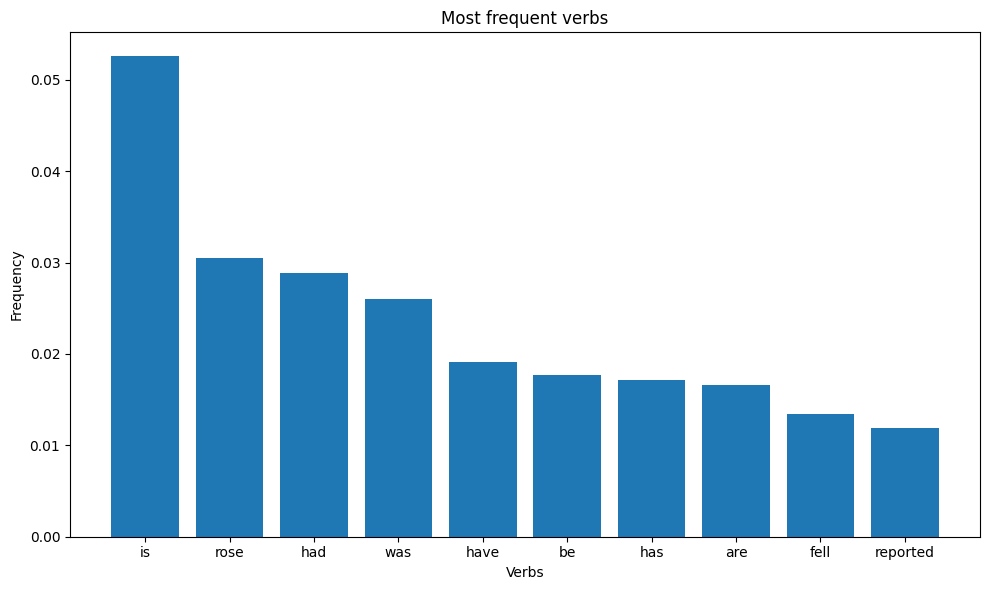

In [32]:
import matplotlib.pyplot as plt
#Which words are frequent as verbs? as first noun? as second noun?
def frequent_verbs(pos_tags):
    count = {}
    freq = {}
    all_verbs = []
    for example in pos_tags:
        for word, tag in example['pos']:
            if tag.startswith('VB'):
                all_verbs.append(word)
                if word in count:
                    count[word] += 1
                else:
                    count[word] = 1
    for word in count: 
        freq[word] = count[word] / len(all_verbs)
    return freq
                
verb_frequencies = frequent_verbs(pp_examples)

sorted_freq = sorted(verb_frequencies.items(), key = lambda item: item[1], reverse = True)
top_10_freq = sorted_freq[:10]
verbs, verb_freq_values = zip(*top_10_freq)
plt.figure(figsize=(10, 6))
plt.bar(verbs, verb_freq_values)
plt.xlabel("Verbs")
plt.ylabel("Frequency")
plt.title("Most frequent verbs")
plt.tight_layout()
plt.show()

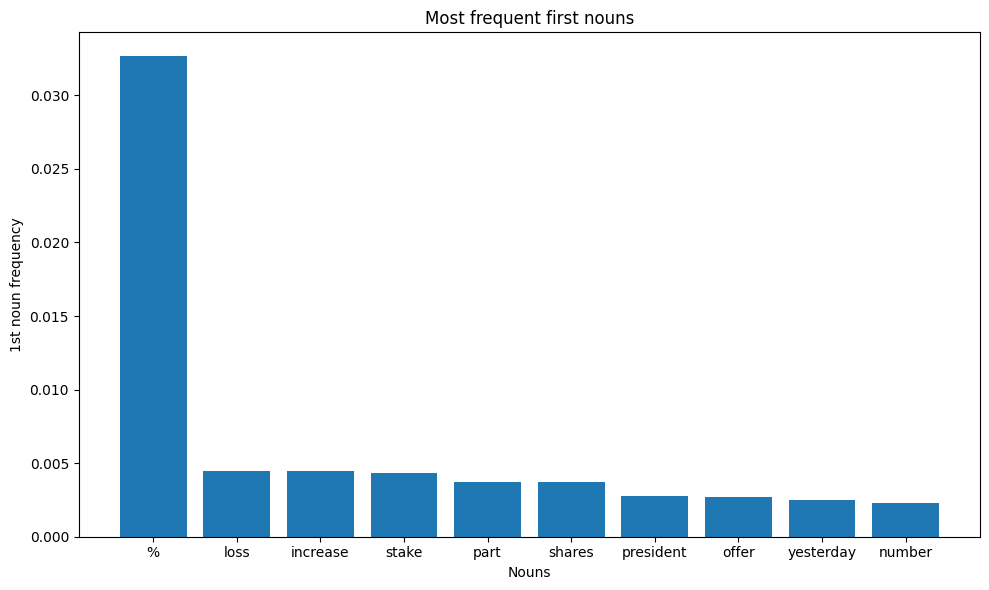

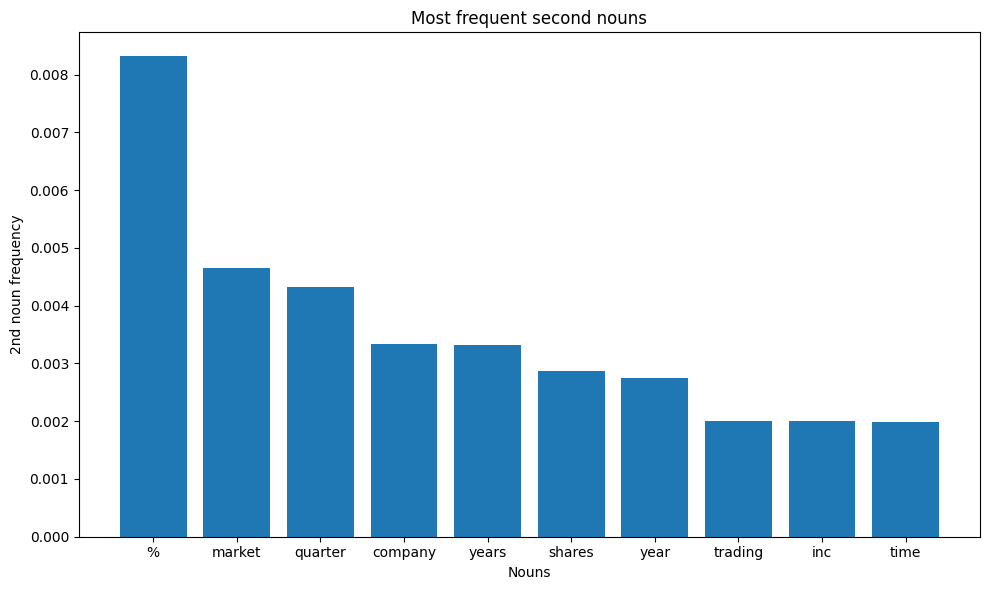

In [33]:
def frequent_nouns(pos_tags, position=1):
    count = {}
    freq = {}
    all_nouns = []
    for example in pos_tags:
        nouns = [word for word, tag in example['pos'] if tag.startswith('N')]
        for word, tag in example['pos']:
            if tag.startswith('N'):
                all_nouns.append(word)
        if len(nouns) >= position: 
            noun = nouns[position - 1]
            if noun in count: 
                count[noun] += 1
            else: 
                count[noun] = 1
    for noun in count: 
        freq[noun] = count[noun] / len(all_nouns)
    return freq

#creating plot for frequent first nouns: 
first_noun_freq = frequent_nouns(pp_examples)

noun_1st_sorted_freq = sorted(first_noun_freq.items(), key = lambda item: item[1], reverse = True)
top_10_1stnoun_freq = noun_1st_sorted_freq[:10]

nouns_1st, noun_1st_freq_values = zip(*top_10_1stnoun_freq)
plt.figure(figsize = (10, 6))
plt.bar(nouns_1st, noun_1st_freq_values)
plt.xlabel("Nouns")
plt.ylabel("1st noun frequency")
plt.title("Most frequent first nouns")
plt.tight_layout()
plt.show()

second_noun_freq = frequent_nouns(pp_examples, 2)
noun_2nd_sorted_freq = sorted(second_noun_freq.items(), key = lambda item: item[1], reverse = True)
top_10_2ndnoun_freq = noun_2nd_sorted_freq[:10]

nouns_2nd, noun_2nd_freq_values = zip(*top_10_2ndnoun_freq)
plt.figure(figsize = (10, 6))
plt.bar(nouns_2nd, noun_2nd_freq_values)
plt.xlabel("Nouns")
plt.ylabel("2nd noun frequency")
plt.title("Most frequent second nouns")
plt.tight_layout()
plt.show()

## Working with a corpus

In [34]:
nltk.download("brown")
nltk.download("punkt")
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lisal\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lisal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
import random

categories = brown.categories()

brown_corpus = {}
for category in categories:
    sentences = brown.sents(categories = category)
    brown_corpus[category] = sentences

sentence_brown_token = []
for category, sentences in brown_corpus.items():
    for sentence in sentences:
        sentence_brown_token.append(sentence)

brown_sentences = [" ".join(sentence) for sentence in sentence_brown_token]
        
random.shuffle(brown_sentences)
feature_sentences = brown_sentences[:50]
print(feature_sentences)

['Such an operator is obviously the zero operator ; ;', 'When he had the mishap of breaking his spectacles , his ecumenical colleagues insisted on providing him with new ones .', 'Across the bridge on the left I saw St. Sophia with its sturdy brown minarets and to the right of them the slenderer spires of the Blue Mosque .', 'This can be accomplished substantially by a continued trend toward better facilities and techniques for fire control and more resources to cope with critical fire periods , and a more intensive application of a program of prevention , detection , and control of insect and disease infestations .', "She put a strong hand under the old man's arm and lifted him up , patiently , with the gentle cruelty and necessary tyranny that the young show toward the very old .", 'He was not the sort of sailor Hudson wanted his backers to see on board and he had Greene wait at Gravesend , where the Discovery picked him up .', 'Even with the increase in funds for the next fiscal yea

In [36]:
from nltk.tokenize import RegexpTokenizer

def check_occurrences(corpus, target_sequence, window_size = 5):
    regex_tokenizer = RegexpTokenizer(r'\w+')
    corpus_token = []
    for sentence in corpus:
        tokenized_sentence = regex_tokenizer.tokenize(sentence)
        corpus_token.append(tokenized_sentence)
    pos_token = [pos_tag(tokens) for tokens in corpus_token]
    pair_count = {}
    triplet_count = {}
    for pos_tags in pos_token:
        for num, (word, pos) in enumerate(pos_tags):
            start = max(0, num - window_size)
            end = min(len(pos_tags), num + window_size + 1)
            window_words = pos_tags[start:end]
            for sequence in target_sequence:
                if len(sequence) == 2:
                    for i in range(len(window_words) - 1):
                        if (window_words[i][1] == sequence[0]) and (window_words[i + 1][1] == sequence[1]):
                            pair_count[sequence] = pair_count.get(sequence, 0) + 1
                elif len(sequence) == 3:
                    if all(tag in [pos for _, pos in window_words] for tag in sequence):
                        triplet_count[sequence] = triplet_count.get(sequence, 0) + 1
    return pair_count, triplet_count

## Model time!

In [37]:
# first try - SVM
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

'''def feature_extraction(data, certain_verb_prep, certain_noun_prep):
    features_list = []
    for sentence in data:
        features = {}
        for preposition in certain_verb_prep: 
            features[f"certain_verb_prep_{preposition}"] = preposition in sentence
        for preposition in certain_noun_prep: 
            features[f"certain_noun_prep_{preposition}"] = preposition in sentence
        features_list.append(features)
    return features_list

X = feature_extraction([example['keywords'] for example in pp_examples], certain_prep_verb, certain_prep_noun)
Y = [example['answer'] for example in pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)
vectorizer = DictVectorizer(sparse = False)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)

Y_val_pred = svm_classifier.predict(X_val)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

#Y_test_pred = svm_classifier.predict(X_test)

#accuracy_test = accuracy_score(Y_val, Y_val_pred)
#print(f"Test accuracy: {accuracy_val}")

Validation Accuracy: 0.7032740397009538'''

'def feature_extraction(data, certain_verb_prep, certain_noun_prep):\n    features_list = []\n    for sentence in data:\n        features = {}\n        for preposition in certain_verb_prep: \n            features[f"certain_verb_prep_{preposition}"] = preposition in sentence\n        for preposition in certain_noun_prep: \n            features[f"certain_noun_prep_{preposition}"] = preposition in sentence\n        features_list.append(features)\n    return features_list\n\nX = feature_extraction([example[\'keywords\'] for example in pp_examples], certain_prep_verb, certain_prep_noun)\nY = [example[\'answer\'] for example in pp_examples]\n\nX_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.3, random_state = 42)\nX_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)\nvectorizer = DictVectorizer(sparse = False)\nX_train = vectorizer.fit_transform(X_train)\nX_val = vectorizer.transform(X_val)\nX_test = vectorizer.transfo

In [38]:
# second try - SVM
'''def feature_extraction(data, certain_verb_prep, certain_noun_prep):
    features_list = []
    for sentence in data:
        features = {}
        pos_tags = pos_tag(sentence)  # added POS-tagging
        for preposition in certain_verb_prep: 
            features[f"certain_verb_prep_{preposition}"] = preposition in sentence
        for preposition in certain_noun_prep: 
            features[f"certain_noun_prep_{preposition}"] = preposition in sentence
        features_list.append(features)
    return features_list

X = feature_extraction([example['keywords'] for example in pp_examples], certain_prep_verb, certain_prep_noun)
Y = [example['answer'] for example in pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)  # changed size
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)
vectorizer = DictVectorizer(sparse = False)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)

Y_val_pred = svm_classifier.predict(X_val)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

I could only see a slight improvement here. After checking to pin-point where the improvement came from, I can say that just adjusting the test size
was beneficial. The POS-tagging didn't seem to have any effect. \n
Validation Accuracy: 0.705723124516628'''

'def feature_extraction(data, certain_verb_prep, certain_noun_prep):\n    features_list = []\n    for sentence in data:\n        features = {}\n        pos_tags = pos_tag(sentence)  # added POS-tagging\n        for preposition in certain_verb_prep: \n            features[f"certain_verb_prep_{preposition}"] = preposition in sentence\n        for preposition in certain_noun_prep: \n            features[f"certain_noun_prep_{preposition}"] = preposition in sentence\n        features_list.append(features)\n    return features_list\n\nX = feature_extraction([example[\'keywords\'] for example in pp_examples], certain_prep_verb, certain_prep_noun)\nY = [example[\'answer\'] for example in pp_examples]\n\nX_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)  # changed size\nX_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)\nvectorizer = DictVectorizer(sparse = False)\nX_train = vectorizer.fit_transform

In [39]:
# third try - SVM

'''def feature_extraction(data, certain_verb_prep, certain_noun_prep):
    features_list = []
    for sentence in data:
        features = {}
        pos_tags = pos_tag(sentence)
        for preposition in certain_verb_prep: 
            features[f"certain_verb_prep_{preposition}"] = preposition in sentence
            features[f"certain_verb_pos_{preposition}"] = any(tag.startswith('VB') for _, tag in pos_tags)
        for preposition in certain_noun_prep: 
            features[f"certain_noun_prep_{preposition}"] = preposition in sentence
            features[f"certain_noun_pos_{preposition}"] = any(tag.startswith('NN') for _, tag in pos_tags)
        features_list.append(features)
    return features_list

X = feature_extraction([example['keywords'] for example in pp_examples], certain_prep_verb, certain_prep_noun)
Y = [example['answer'] for example in pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)  # changed size
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)
vectorizer = DictVectorizer(sparse = False)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)

Y_val_pred = svm_classifier.predict(X_val)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

That just made it worse, trying something else\n
Validation Accuracy: 0.7041763341067285'''

'def feature_extraction(data, certain_verb_prep, certain_noun_prep):\n    features_list = []\n    for sentence in data:\n        features = {}\n        pos_tags = pos_tag(sentence)\n        for preposition in certain_verb_prep: \n            features[f"certain_verb_prep_{preposition}"] = preposition in sentence\n            features[f"certain_verb_pos_{preposition}"] = any(tag.startswith(\'VB\') for _, tag in pos_tags)\n        for preposition in certain_noun_prep: \n            features[f"certain_noun_prep_{preposition}"] = preposition in sentence\n            features[f"certain_noun_pos_{preposition}"] = any(tag.startswith(\'NN\') for _, tag in pos_tags)\n        features_list.append(features)\n    return features_list\n\nX = feature_extraction([example[\'keywords\'] for example in pp_examples], certain_prep_verb, certain_prep_noun)\nY = [example[\'answer\'] for example in pp_examples]\n\nX_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [40]:
# fourth try - SVM
from nltk.corpus import wordnet as wn

'''def feature_extraction(data, certain_verb_prep, certain_noun_prep):
    features_list = []
    for sentence in data:
        features = {}
        pos_tags = pos_tag(sentence)
        for preposition in certain_verb_prep: 
            features[f"certain_verb_prep_{preposition}"] = preposition in sentence
        for preposition in certain_noun_prep: 
            features[f"certain_noun_prep_{preposition}"] = preposition in sentence
        for word in sentence: 
            syn_word = wn.synsets(word)
            for synset in syn_word:
                examples = synset.examples()
                features[f"Usage_examples_{word}"] = any(example in sentence for example in examples)
        features_list.append(features)
    return features_list

X = feature_extraction([example['keywords'] for example in pp_examples], certain_prep_verb, certain_prep_noun)
Y = [example['answer'] for example in pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)  # changed size
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)
vectorizer = DictVectorizer(sparse = False)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)

Y_val_pred = svm_classifier.predict(X_val)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

this also didn't seem to improve overall performance, so I will be trying to work with n-grams\n
Validation Accuracy: 0.705723124516628'''

'def feature_extraction(data, certain_verb_prep, certain_noun_prep):\n    features_list = []\n    for sentence in data:\n        features = {}\n        pos_tags = pos_tag(sentence)\n        for preposition in certain_verb_prep: \n            features[f"certain_verb_prep_{preposition}"] = preposition in sentence\n        for preposition in certain_noun_prep: \n            features[f"certain_noun_prep_{preposition}"] = preposition in sentence\n        for word in sentence: \n            syn_word = wn.synsets(word)\n            for synset in syn_word:\n                examples = synset.examples()\n                features[f"Usage_examples_{word}"] = any(example in sentence for example in examples)\n        features_list.append(features)\n    return features_list\n\nX = feature_extraction([example[\'keywords\'] for example in pp_examples], certain_prep_verb, certain_prep_noun)\nY = [example[\'answer\'] for example in pp_examples]\n\nX_train, X_toval, Y_train, Y_toval = train_test_split(X, 

In [41]:
# fifth try - SVM

'''def word_position(sentence, pos_tags, search_pos):
    word_positions = [i for i, (word, pos) in enumerate(pos_tags) if pos.startswith(search_pos)]  # maybe try it with words instead of positions
    return word_positions

def feature_extraction(data, certain_verb_prep, certain_noun_prep):
    features_list = []
    for example in data:
        sentence = example['keywords']
        pos_tags = example['pos']
        features = {}
        features["identity_verb"] = str(word_position(sentence, pos_tags, 'VB'))
        features["identity_prep"] = str(word_position(sentence, pos_tags, 'IN')) + str(word_position(sentence, pos_tags, 'TO'))
        features["identity_noun"] = str(word_position(sentence, pos_tags, 'NN'))

        features["identity_verb_prep"] = (features["identity_verb"], features["identity_prep"])
        features["identity_noun_prep"] = (features["identity_noun"], features["identity_prep"])
        features["identity_prep_noun"] = (features["identity_prep"], features["identity_noun"])

        features["identity_verb_prep_noun"] = (features["identity_verb"], features["identity_prep"], features["identity_noun"])
        features["identity_noun_prep_noun"] = (features["identity_noun"], features["identity_prep"], features["identity_noun"])
        
        features["identity_verb_prep_noun_noun"] = (features["identity_verb"], features["identity_prep"], features["identity_noun"], features["identity_noun"])
        
        for preposition in certain_verb_prep: 
            features[f"certain_verb_prep_{preposition}"] = preposition in sentence
            
        for preposition in certain_noun_prep: 
            features[f"certain_noun_prep_{preposition}"] = preposition in sentence
            
        for word in sentence: 
            syn_word = wn.synsets(word)
            for synset in syn_word:
                examples = synset.examples()
                features[f"Usage_examples_{word}"] = any(example in sentence for example in examples)
        features_list.append(features)
    return features_list

X = feature_extraction(pp_examples, certain_prep_verb, certain_prep_noun)
Y = [example['answer'] for example in pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)
vectorizer = DictVectorizer(sparse = False)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

svm_classifier = SVC(kernel = "linear")
svm_classifier.fit(X_train, Y_train)

Y_val_pred = svm_classifier.predict(X_val)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

 I could see a slight improvement here, so I will be trying to connect my features\n
Validation Accuracy: 0.7072699149265275
'''

'def word_position(sentence, pos_tags, search_pos):\n    word_positions = [i for i, (word, pos) in enumerate(pos_tags) if pos.startswith(search_pos)]  # maybe try it with words instead of positions\n    return word_positions\n\ndef feature_extraction(data, certain_verb_prep, certain_noun_prep):\n    features_list = []\n    for example in data:\n        sentence = example[\'keywords\']\n        pos_tags = example[\'pos\']\n        features = {}\n        features["identity_verb"] = str(word_position(sentence, pos_tags, \'VB\'))\n        features["identity_prep"] = str(word_position(sentence, pos_tags, \'IN\')) + str(word_position(sentence, pos_tags, \'TO\'))\n        features["identity_noun"] = str(word_position(sentence, pos_tags, \'NN\'))\n\n        features["identity_verb_prep"] = (features["identity_verb"], features["identity_prep"])\n        features["identity_noun_prep"] = (features["identity_noun"], features["identity_prep"])\n        features["identity_prep_noun"] = (features["id

In [42]:
''' abandoned features: 
        features["identity_verb"] = str(word_position(sentence, pos_tags, 'VB'))
        features["identity_prep"] = str(word_position(sentence, pos_tags, 'IN')) + str(word_position(sentence, pos_tags, 'TO'))
        features["identity_noun"] = str(word_position(sentence, pos_tags, 'NN'))

        features["identity_verb_prep"] = " ".join(str(value) for value in (features["identity_verb"], features["identity_prep"]))
        features["identity_noun_prep"] = " ".join(str(value) for value in (features["identity_noun"], features["identity_prep"]))
        features["identity_prep_noun"] = " ".join(str(value) for value in (features["identity_prep"], features["identity_noun"]))

        features["identity_verb_prep_noun"] = " ".join(str(value) for value in (features["identity_verb"], features["identity_prep"], features["identity_noun"]))
        features["identity_noun_prep_noun"] = " ".join(str(value) for value in (features["identity_noun"], features["identity_prep"], features["identity_noun"]))
        
        features["identity_verb_prep_noun_noun"] = " ".join(str(value) for value in (features["identity_verb"], features["identity_prep"], features["identity_noun"], features["identity_noun"]))
        '''
'''for word in sentence: 
            syn_word = wn.synsets(word)
            for synset in syn_word:
                examples = synset.examples()
                for example in examples: 
                    if features["identity_verb_prep"] or features["identity_noun_prep"] or features["identity_prep_noun"] in example:
                        features[f"Usage_examples_{word}"] = any(example in sentence for example in examples)'''

'for word in sentence: \n            syn_word = wn.synsets(word)\n            for synset in syn_word:\n                examples = synset.examples()\n                for example in examples: \n                    if features["identity_verb_prep"] or features["identity_noun_prep"] or features["identity_prep_noun"] in example:\n                        features[f"Usage_examples_{word}"] = any(example in sentence for example in examples)'

In [43]:
import gensim.downloader as gensim

glove_model = gensim.load("glove-wiki-gigaword-50")

In [140]:
import random
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer
import spacy

nlp = spacy.load("en_core_web_sm")


def word_position(sentence, pos_tags, search_pos):
    word_positions = [word for i, (word, pos) in enumerate(pos_tags) if pos.startswith(search_pos)]  # maybe try it with words instead of positions
    return " ".join(word_positions)

def feature_extraction(data, pos_tags, certain_verb_prep, certain_noun_prep, word_pairs, word_triplet):
    features_list = []
    for sentence, tags in zip(data, pos_tags):
        features = {}
        pos_sequence = [tag for word, tag in tags]
        features["pos_sequence"] = " ".join(pos_sequence)
        word_embeddings = []
        for word in sentence:
            try:
                word_embedding = glove_model[word]
            except KeyError:
                word_embedding = np.random.normal(size=50)
            word_embeddings.append(word_embedding)
        if word_embeddings:
            features["word_embeddings"] = " ".join(str(value) for value in np.mean(word_embeddings, axis = 0))
        else: 
            features["word_embeddings"] = " ".join(str(value) for value in np.zeros(50))
        sentence_str = " ".join(sentence)
        ner = []
        doc = nlp(sentence_str)
        for ent in doc.ents:
            ner.append(ent)
        features["Named_entities"] = " ".join(str(value) for value in ner)
        for preposition in certain_verb_prep: 
            features[f"certain_verb_prep_{preposition}"] = str(preposition in sentence)            
        for preposition in certain_noun_prep: 
            features[f"certain_noun_prep_{preposition}"] = str(preposition in sentence)
        for pair, count in word_pairs.items():
            features[f"word_pairs{pair}"] = count
        for triplet, count in word_triplet.items():
            features[f"word_triplets{triplet}"] = count
        all_features = " ".join(str(value) for value in features.values())
        features_list.append(all_features)
    return features_list
        
random.shuffle(pp_examples)
test_pp_examples = pp_examples[:5000]
joined_examples = [' '.join(example['keywords']) for example in test_pp_examples]

test_freq_prep_verb, test_certain_prep_verb, test_confusing_prep_verb = count_freq_prep(get_unique_prepositions(pp_examples), 'V')
test_freq_prep_noun, test_certain_prep_noun, test_confusing_prep_noun = count_freq_prep(get_unique_prepositions(pp_examples), 'N')

sequences = [("VB", "IN" or "TO"), ("NN", "IN" or "TO"), ("NN", "IN", "NN")]
pair_counts, triplet_counts = check_occurrences(feature_sentences, sequences)

on is rather confusing
near is rather confusing
below is rather confusing
despite occurrs over 90% of the time with a V
next occurrs over 90% of the time with a V
until occurrs over 90% of the time with a V
onto occurrs over 90% of the time with a V
above is rather confusing
amid occurrs over 90% of the time with a V
while occurrs over 90% of the time with a V
unlike occurrs over 90% of the time with a V
aboard occurrs over 90% of the time with a V
alongside is rather confusing
in is rather confusing
on is rather confusing
unto occurrs over 90% of the time with a N
near is rather confusing
of occurrs over 90% of the time with a N
below is rather confusing
vs. occurrs over 90% of the time with a N
besides occurrs over 90% of the time with a N
above is rather confusing
alongside is rather confusing
in is rather confusing
per occurrs over 90% of the time with a N
oversaw occurrs over 90% of the time with a N


In [141]:
X = joined_examples
Y = [example['answer'] for example in test_pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)

X_train_features = feature_extraction(X_train, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_val_features = feature_extraction(X_val, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_test_features = feature_extraction(X_test, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
pipeline = Pipeline([
    ("features", FeatureUnion([
        ("text", Pipeline([("vect", CountVectorizer(binary=True, ngram_range=(1, 4)))])),
    ])),
    ("svm", SVC(kernel="rbf", C = 10))
])
pipeline.fit(X_train_features, Y_train)

Y_val_pred = pipeline.predict(X_val_features)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation accuracy: {accuracy_val}")

Y_test_pred = pipeline.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {accuracy_test}")

# before change: Validation accuracy: 0.672
# after first improvement: Validation accuracy: 0.708 (C=10, test_size = 0.2)
# no further improvements after tweaking C
# giving more data (10000 indeces) worsened the validation accuracy: 0.676

Validation accuracy: 0.68
Test accuracy: 0.686


In [142]:
from sklearn.naive_bayes import MultinomialNB

X = joined_examples
Y = [example['answer'] for example in test_pp_examples]

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)

X_train_features = feature_extraction(X_train, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_val_features = feature_extraction(X_val, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_test_features = feature_extraction(X_test, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)


pipeline = Pipeline([
    ("features", FeatureUnion([
        ("text", Pipeline([("vect", CountVectorizer(binary=True, ngram_range=(1, 4)))])),
    ])),
    ("nb", MultinomialNB(alpha = 1.5))
])
pipeline.fit(X_train_features, Y_train)

Y_val_pred = pipeline.predict(X_val_features)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation accuracy: {accuracy_val}")


Y_test_pred = pipeline.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {accuracy_test}")
# before: Validation accuracy: 0.5653333333333334
# after first change: Validation accuracy: 0.526 (alpha = 0.25, test_size = 0.2)
# after second change: Validation accuracy: 0.534(alpha = 1.25)
# after change 3: 0.534 (alpha = 1.5)

Validation accuracy: 0.544
Test accuracy: 0.564


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)

X_train_features = feature_extraction(X_train, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_val_features = feature_extraction(X_val, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_test_features = feature_extraction(X_test, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)


pipeline = Pipeline([
    ("features", FeatureUnion([
        ("text", Pipeline([("vect", CountVectorizer(binary=True, ngram_range=(1, 4)))])),
    ])),
    ("rf", RandomForestClassifier(n_estimators = 150, random_state = 42))
])
pipeline.fit(X_train_features, Y_train)

Y_val_pred = pipeline.predict(X_val_features)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation accuracy: {accuracy_val}")

Y_test_pred = pipeline.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {accuracy_test}")
# before: Validation accuracy: 0.672 (n_estimators = 100, test_size = 0.2)
# after first change: Validation accuracy: 0.706 (n_estimators = 150, test_size = 0.2)
# after change 2: no change in accuracy (n_estimators = 200)

Validation accuracy: 0.672
Test accuracy: 0.684


In [144]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)

X_train_features = feature_extraction(X_train, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_val_features = feature_extraction(X_val, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_test_features = feature_extraction(X_test, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)

pipeline = Pipeline([
    ("features", FeatureUnion([
        ("text", Pipeline([("vect", CountVectorizer(binary=True, ngram_range=(1, 4)))])),
    ])),
    ("lr", LogisticRegression(random_state = 42, C = 0.001, penalty = "l2"))
])
pipeline.fit(X_train_features, Y_train)

Y_val_pred = pipeline.predict(X_val_features)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation accuracy: {accuracy_val}")

Y_test_pred = pipeline.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {accuracy_test}")
# before: Validation accuracy: 0.6706666666666666 (test_size = 0.3, C=10, max_iter = 5000)
# after change 1: Validation accuracy: 0.702 (test_size = 0.2, C = 0.1) 
# after improvement 2: Validation accuracy: 0.704 (C = 0.01)
# after improvement 3:Validation accuracy: 0.706 (C=0.001)


Validation accuracy: 0.68
Test accuracy: 0.686


In [145]:
from sklearn.linear_model import RidgeClassifier

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)

X_train_features = feature_extraction(X_train, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_val_features = feature_extraction(X_val, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_test_features = feature_extraction(X_test, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)

pipeline = Pipeline([
    ("features", FeatureUnion([
        ("text", Pipeline([("vect", CountVectorizer(binary=True, ngram_range=(1, 4)))])),
    ])),
    ("ridge", RidgeClassifier(random_state = 42, alpha = 1.5))
])
pipeline.fit(X_train_features, Y_train)

Y_val_pred = pipeline.predict(X_val_features)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation accuracy: {accuracy_val}")


Y_test_pred = pipeline.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {accuracy_test}")
# after first change: Validation accuracy: 0.702 (test_size = 0.2)

Validation accuracy: 0.672
Test accuracy: 0.682


In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_toval, Y_train, Y_toval = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_toval, Y_toval, test_size = 0.5, random_state = 42)

X_train_features = feature_extraction(X_train, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_val_features = feature_extraction(X_val, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)
X_test_features = feature_extraction(X_test, [example['pos'] for example in test_pp_examples], certain_prep_verb, certain_prep_noun, pair_counts, triplet_counts)

pipeline = Pipeline([
    ("features", FeatureUnion([
        ("text", Pipeline([("vect", CountVectorizer(binary=True, ngram_range=(1, 4)))])),
    ])),
    ("dt", DecisionTreeClassifier(random_state = 42, ccp_alpha = 1.25))
])
pipeline.fit(X_train_features, Y_train)

Y_val_pred = pipeline.predict(X_val_features)

accuracy_val = accuracy_score(Y_val, Y_val_pred)
print(f"Validation accuracy: {accuracy_val}")

Y_test_pred = pipeline.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test accuracy: {accuracy_test}")
#after first change: Validation accuracy: 0.568 (test_size = 0.2, ccp_alpha = 1.25)

Validation accuracy: 0.546
Test accuracy: 0.564


## Side note - final thoughts - "best" models: SVM and Logistic Regression test accuracy 0.686 

In [ ]:
'''I am honestly quite disappointed in the results. 
I think I went wrong in a few places. 
First are the features. I think there are quite a few which are either redundant and unneccessary or plainly confusing the models. 
It might have been better to focus on less features and figure out which combination works best. Instead of going for the "more is more"-approach.
The confusion part became clearer to me the more data I used and the worse my results got. 
I had made it up to 75% accuracy in validation sets. However, I noticed that I didn't follow the proper order of splitting the sets first and then using the features.'''
